# Exploratory Data Analysis for Software Usage Uplift Project

## Rebecca Neel &nbsp; &nbsp; 08/22/2023

[Data Source](https://www.kaggle.com/datasets/hwwang98/software-usage-promotion-campaign-uplift-model)

## Load Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
data = pd.read_csv('../data/raw/multi_attribution.csv')
data.head()

,Global Flag,Major Flag,SMC Flag,Commercial Flag,IT Spend,Employee Count,PC Count,Size,Tech Support,Discount,Revenue
0,1,0,1,0,45537,26,26,152205,0,1,17688.36300
1,0,0,1,1,20842,107,70,159038,0,1,14981.43559
2,0,0,0,1,82171,10,7,264935,1,1,32917.13894
3,0,0,0,0,30288,40,39,77522,1,1,14773.76855
4,0,0,1,0,25930,37,43,91446,1,1,17098.69823


In [3]:
data.shape

(2000, 11)

The data contains several "flags" indicating whether or not a company has certain characteristics. The distribution of the data in these characteristics is visualized in bar plots below.

To summarize, most companies we serve are...

- not global
- major consumers of software in their industry
- evenly distributed between small-to-medium corporations, and small businesses or large corporations
- mostly in the public sector (only a few are commercial enterprises)

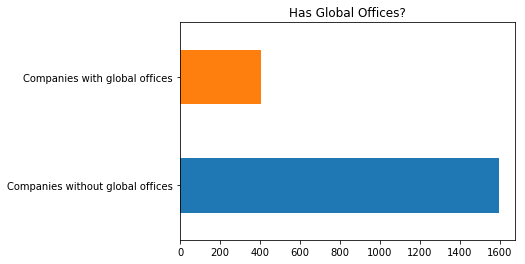

In [59]:
fig, ax = plt.subplots()

data['Global Flag'].value_counts().plot(kind='barh', ax=ax)
ax.set(title='Has Global Offices?')
ax.set_yticklabels(['Companies without global offices', 'Companies with global offices']);

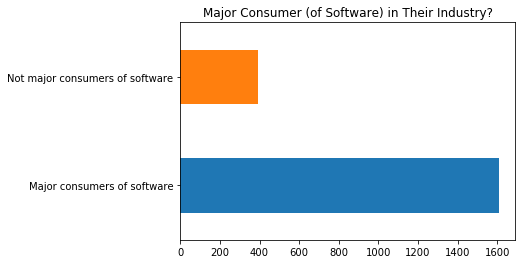

In [60]:
fig, ax = plt.subplots()

data['Major Flag'].value_counts().plot(kind='barh', ax=ax)
ax.set(title='Major Consumer (of Software) in Their Industry?')
ax.set_yticklabels(['Major consumers of software', 'Not major consumers of software']);

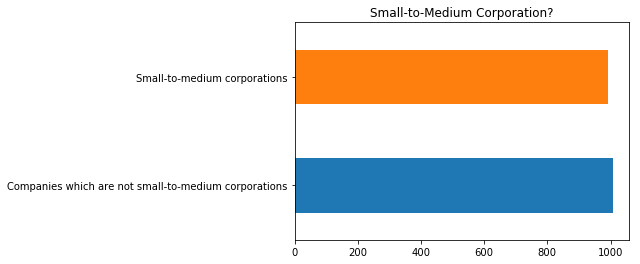

In [61]:
fig, ax = plt.subplots()

data['SMC Flag'].value_counts().plot(kind='barh', ax=ax)
ax.set(title='Small-to-Medium Corporation?')
ax.set_yticklabels(['Companies which are not small-to-medium corporations', 'Small-to-medium corporations']);

Of those companies that are *not* small to medium corporations, they are a mixture of large corporations and small businesses, based on the distribution of the companies' sizes.

In [23]:
data.loc[data['SMC Flag'] == 0, 'Size'].describe()

count       991.000000
mean     117045.086781
std      101890.004878
min       10101.000000
25%       41265.000000
50%       85971.000000
75%      159363.000000
max      766485.000000
Name: Size, dtype: float64

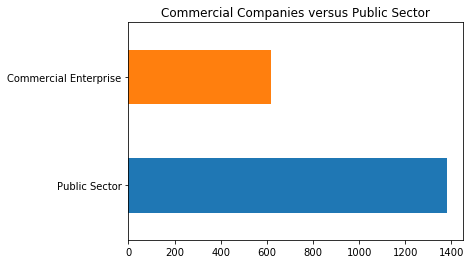

In [24]:
fig, ax = plt.subplots()

data['Commercial Flag'].value_counts().plot(kind='barh', ax=ax)
ax.set(title='Commercial Companies versus Public Sector')
ax.set_yticklabels(['Public Sector', 'Commercial Enterprise']);

In [9]:
data.describe()

,Global Flag,Major Flag,SMC Flag,Commercial Flag,IT Spend,Employee Count,PC Count,Size,Tech Support,Discount,Revenue
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.202000,0.1950,0.504500,0.691000,28272.703000,61.115000,57.345500,113159.120000,0.503000,0.510500,15397.917422
std,0.401593,0.3963,0.500105,0.462197,28207.138885,53.449707,52.861123,100987.600092,0.500116,0.500015,11290.944451
min,0.000000,0.0000,0.000000,0.000000,1161.000000,10.000000,6.000000,10101.000000,0.000000,0.000000,-616.572451
25%,0.000000,0.0000,0.000000,0.000000,8914.000000,24.000000,22.000000,39282.000000,0.000000,0.000000,7545.052008
50%,0.000000,0.0000,1.000000,1.000000,19210.500000,44.000000,41.000000,81378.000000,1.000000,1.000000,12582.446440
75%,0.000000,0.0000,1.000000,1.000000,37991.500000,79.000000,74.000000,155635.000000,1.000000,1.000000,19662.979475
max,1.000000,1.0000,1.000000,1.000000,259808.000000,535.000000,407.000000,766485.000000,1.000000,1.000000,86006.924450


The data also contains information about the amount of money companies spent on IT last year, along with the total revenue we earned from them last year. That information is visualized in box plots below (with outliers excluded, of which there are approximately 15 to 20.)

To summarize, most companies spent...
- between \$1000 and \$80,000 on IT, with the average around \$28,000
- between $-$\$600 and \$36,000 total last year

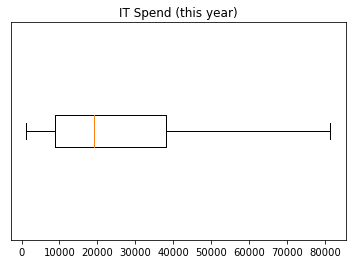

In [41]:
fig, ax = plt.subplots()

plt.boxplot(x=data['IT Spend'], sym='', vert=False)

ax.set(title='IT Spend (this year)')

# remove y-axis tickmark and label
ax.set_yticklabels([''])
ax.set_yticks([]);

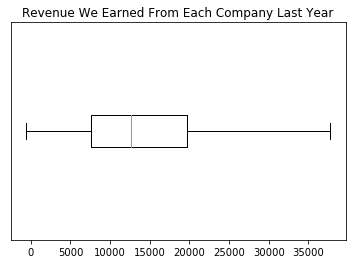

In [49]:
fig, ax = plt.subplots()

plt.boxplot(x=data['Revenue'], sym='', vert=False)

ax.set(title='Revenue We Earned From Each Company Last Year')

# remove y-axis tickmark and label
ax.set_yticklabels([''])
ax.set_yticks([]);

Finally, the data also contains an employee count, PC count and size (in annual revenue) for each company we serve. Below are those distributions in boxplot form (with outliers excluded.)

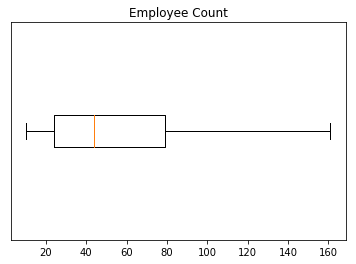

In [42]:
fig, ax = plt.subplots()

plt.boxplot(x=data['Employee Count'], sym='', vert=False)

ax.set(title='Employee Count')

# remove y-axis tickmark and label
ax.set_yticklabels([''])
ax.set_yticks([]);

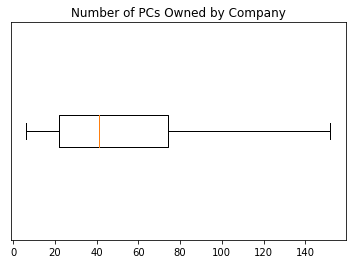

In [43]:
fig, ax = plt.subplots()

plt.boxplot(x=data['PC Count'], sym='', vert=False)

ax.set(title='Number of PCs Owned by Company')

# remove y-axis tickmark and label
ax.set_yticklabels([''])
ax.set_yticks([]);

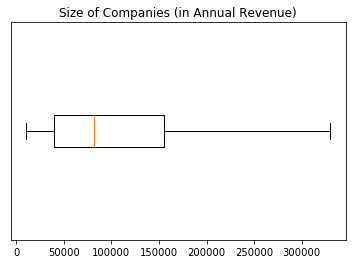

In [46]:
fig, ax = plt.subplots()

plt.boxplot(x=data['Size'], sym='', vert=False)

ax.set(title='Size of Companies (in Annual Revenue)')

# remove y-axis tickmark and label
ax.set_yticklabels([''])
ax.set_yticks([]);

The features we want to investigate here are "Tech Support" and "Discount".

We want to investigate which companies will be most likely to spend more than they would have otherwise if they are given tech support or offered a discount.

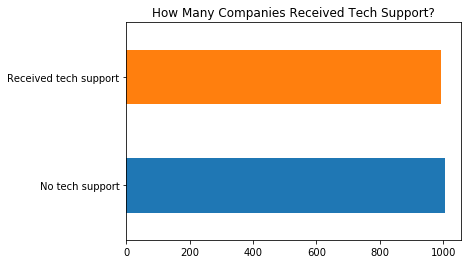

In [50]:
fig, ax = plt.subplots()

data['Tech Support'].value_counts().plot(kind='barh', ax=ax)
ax.set(title='How Many Companies Received Tech Support?')
ax.set_yticklabels(['No tech support', 'Received tech support']);

Roughly the same number of companies fall into the treatment group versus the control group for investigating tech support which makes this a good fit for an uplift model (assuming that companies that received tech support were "selected" randomly.\*)

\* *In reality, this is probably a flawed assumption because companies who self-select to receive tech support may tend to have other characteristics, not necessarily recorded in this data, which make them more likely to spend more.*

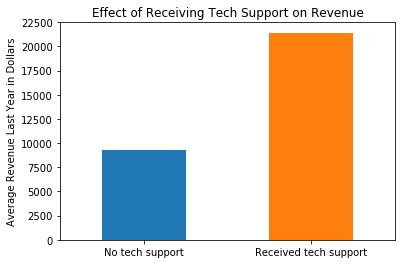

In [56]:
fig, ax = plt.subplots()

data.groupby(['Tech Support']).mean()['Revenue'].plot(kind='bar', ax=ax)
ax.set(title='Effect of Receiving Tech Support on Revenue')
ax.set_xticklabels(['No tech support', 'Received tech support'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Average Revenue Last Year in Dollars');

According to the plot above, companies that *did* receive tech support generated more revenue *on average* (over twice as much) last year than companies that did not receive tech support from us.

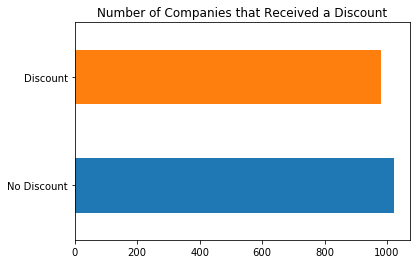

In [57]:
fig, ax = plt.subplots()

data['Discount'].value_counts().plot(kind='barh', ax=ax)
ax.set(title='Number of Companies that Received a Discount')
ax.set_yticklabels(['No Discount', 'Discount']);

Roughly the same number of companies fall into the treatment group versus the control group for investigating disocunts which makes this a good fit for an uplift model (assuming that companies that received a discount were "selected" randomly.\)

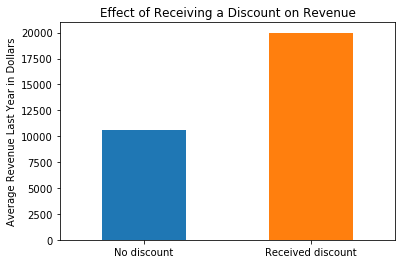

In [58]:
fig, ax = plt.subplots()

data.groupby(['Discount']).mean()['Revenue'].plot(kind='bar', ax=ax)
ax.set(title='Effect of Receiving a Discount on Revenue')
ax.set_xticklabels(['No discount', 'Received discount'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Average Revenue Last Year in Dollars');

On average, companies that received a discount spent more overall last year than companies which did not.

Note that, if the discount was offered based on amount spent, e.g. \$50 off a purchase of \$500 or more, then this could explain the difference in average spent, but this doesn't prevent us from predicting uplift effectively. (In fact, we *want* to determine the causal effect of discount on spending behavior.)

It remains to be seen whether or not the features we have for each company are informative for uplift.

<u>Next Steps</u>

Calculate actual uplift by revenue group

- Divide companies into quintiles by revenue
- Calculate the uplift for each revenue group